### Importing the data

In [2]:
import os
import tarfile
import urllib
#declare the link we are downloading from
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
#Create a local path where the house dataset will be stored
HOUSING_PATH = os.path.join("datasets","housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL,housing_path=HOUSING_URL):
    #using os we create a for the housing csv if it exsits we don't create a copy
    os.makedirs(housing_path,exist_ok=True)
    tgz_path = os.path.join(housing_path,"housing.tgz")
    #this using urlib to download data from housing url and save it locally at tgz_path
    urllib.request.urlretrieve(housing_url,tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()


In [4]:
fetch_housing_data()

URLError: <urlopen error [Errno -3] Temporary failure in name resolution>

### since the data was in tgz form we must first open it with gzip then load it into a pandas dataframe

In [5]:
import pandas as pd
import gzip

def load_housing_data():
    csv_path = "/home/icaarus/Desktop/deep learning/datasets/housing/housing.csv.gz"
    with gzip.open(csv_path, 'rt', encoding='utf-8') as file:
        return pd.read_csv(file)

housing = load_housing_data()







In [6]:
housing.head()

,housing.csv,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20641 entries, 0 to 20640
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   housing.csv         20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
#this function is used to infer and get a feel for the data 
housing.describe()

,housing.csv,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


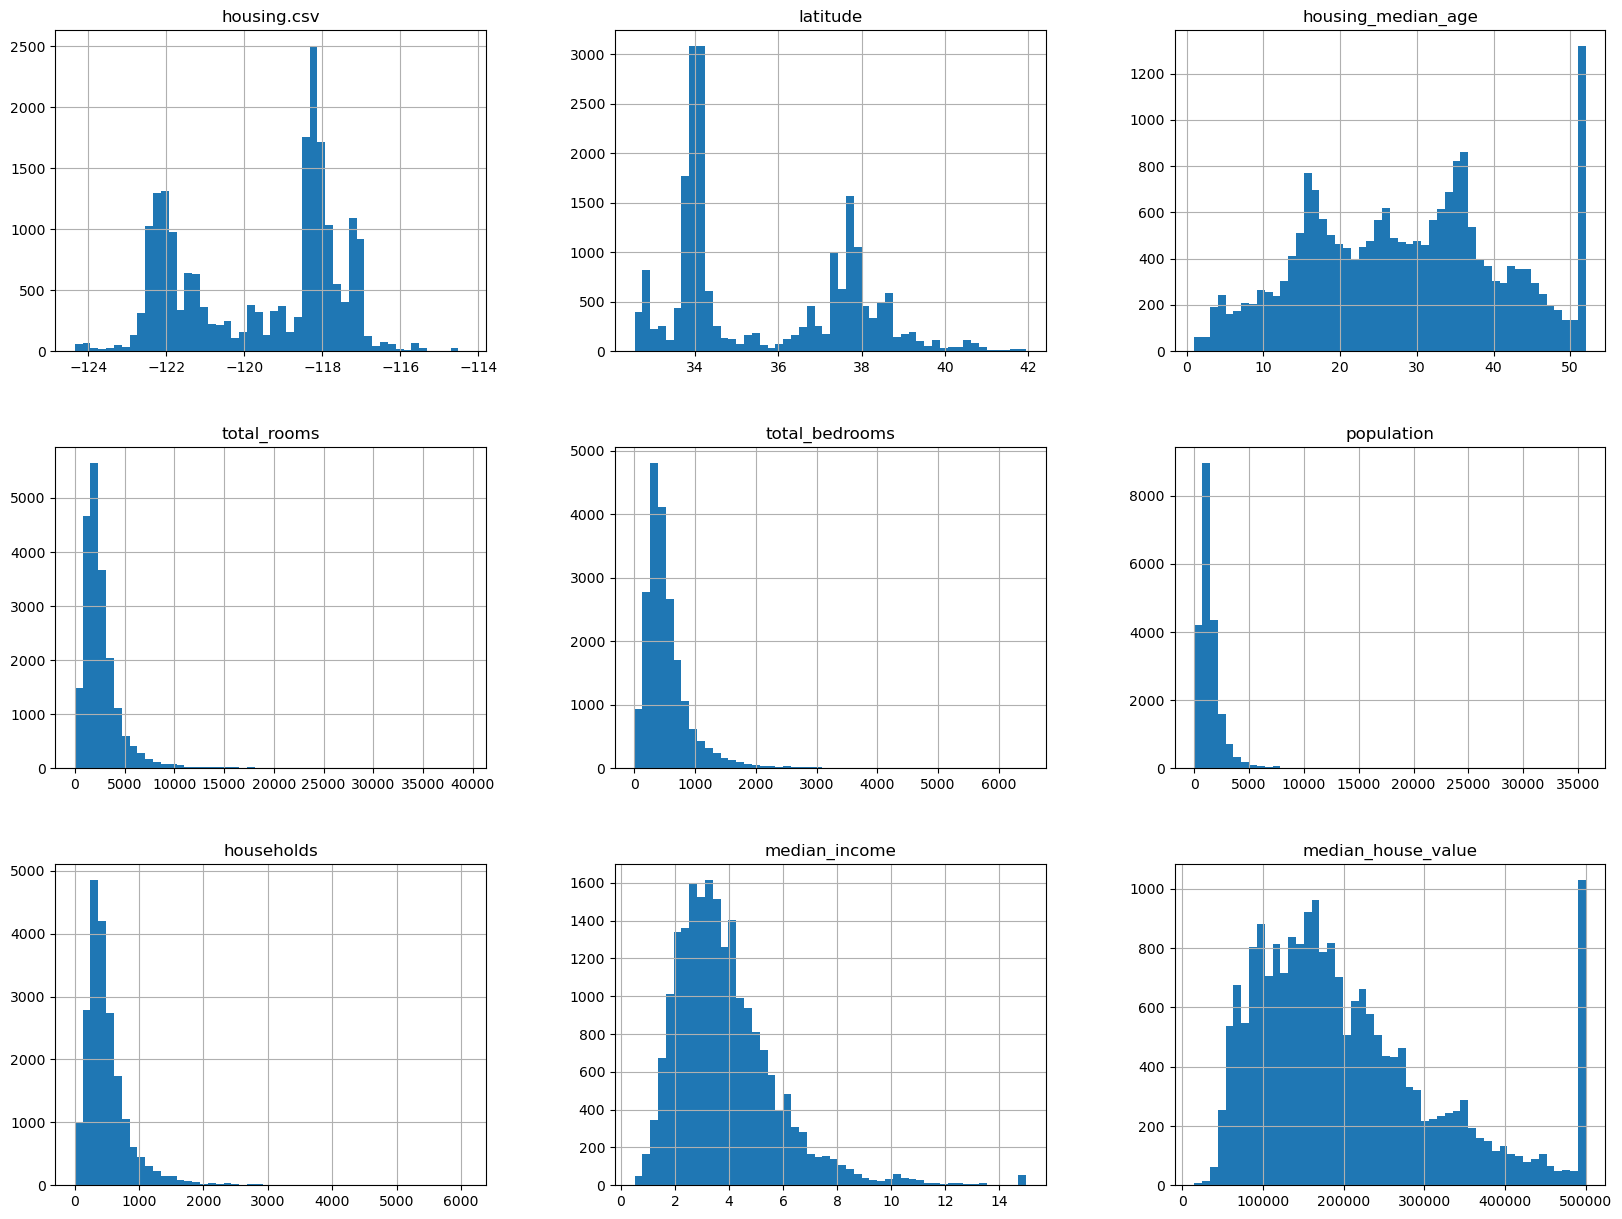

In [10]:

import matplotlib.pyplot as plt
housing.hist(bins=50,figsize=(20,15))
plt.show()

### lets create a test set from the data

In [11]:
import numpy as np
def split_train_test(data,test_ratio):
    # this creates a new array of random permutations of length data which are used as the indices for the data
    shuffled_indices = np.random.permutation(len(data))
    # we cut the data by the test_ratio and assign it to the variable test set size 
    test_set_size = int(len(data) * test_ratio)
    #the test indices are equal to the first index of shuffled array to the test-size number index of shuffled array
    test_indices = shuffled_indices[:test_set_size]
    #the train indices are equal to from test-size number index of shuffled arry to the last index
    train_indices = shuffled_indices[test_set_size:]
     # Return the training and testing data using the calculated indices
    return data.iloc[train_indices], data.iloc[test_indices]

lets now spilt the data into train and test 

In [12]:
train_set, test_set = split_train_test(housing, 0.2)

In [13]:
len(train_set)

16513

In [14]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda x: test_set_check(x, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

housing_with_id = housing.reset_index()
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")


In [15]:
train_set

,index,housing.csv,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
6,6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...,...
20636,20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [16]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)


In [17]:
train_set

,housing.csv,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
3665,-118.37,34.22,17.0,1787.0,463.0,1671.0,448.0,3.5521,151500.0,<1H OCEAN
6669,-118.11,34.16,52.0,3158.0,459.0,1229.0,444.0,5.4223,325600.0,INLAND
9722,-121.66,36.89,15.0,2608.0,458.0,1531.0,457.0,5.5148,253500.0,<1H OCEAN
5525,-118.37,33.97,32.0,6699.0,1781.0,2725.0,1544.0,3.3889,285700.0,<1H OCEAN
4328,-118.33,34.08,50.0,2989.0,832.0,1345.0,775.0,3.2426,442900.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,229200.0,<1H OCEAN
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,97800.0,INLAND
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,222100.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN


<Axes: >

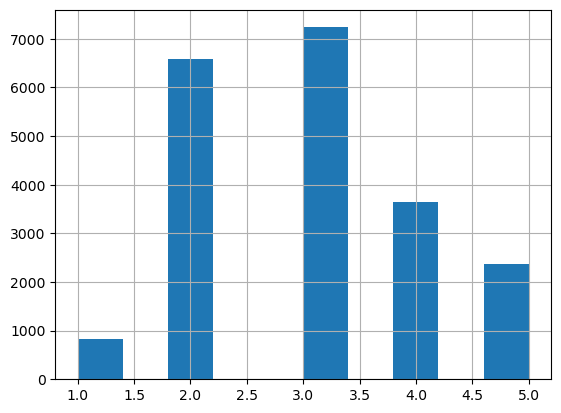

In [18]:
housing["income_cat"] = pd.cut(housing['median_income'],bins= [0., 1.5, 3.0, 4.5, 6., np.inf],labels=[1,2,3,4,5])
housing['income_cat'].hist()

In [19]:
from sklearn.model_selection import StratifiedShuffleSplit

# Handle missing values in 'income_cat' column
housing.dropna(subset=['income_cat'], inplace=True)

# Stratified sampling
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]



In [20]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [21]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

# Insights :lets explore our data

In [22]:
housing = strat_train_set.copy()

In [23]:
housing.rename(columns={'housing.csv': 'longitude'}, inplace=True)
housing['longitude']

12655   -121.46
15502   -117.23
2908    -119.04
14053   -117.13
20496   -118.70
          ...  
15174   -117.07
12661   -121.42
19263   -122.72
19140   -122.70
19773   -122.14
Name: longitude, Length: 16512, dtype: float64

<Axes: xlabel='longitude', ylabel='latitude'>

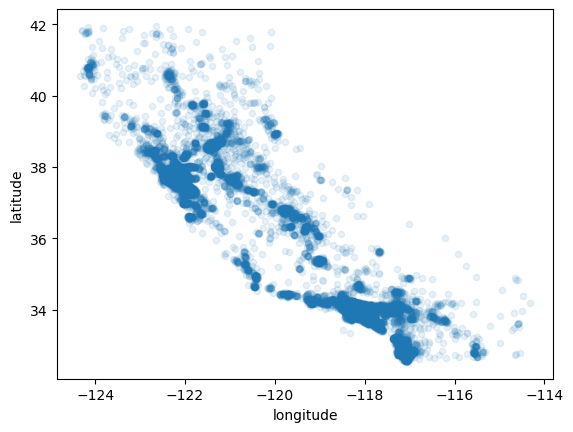

In [24]:
housing.plot(kind="scatter", x="longitude", y="latitude",alpha=0.1)


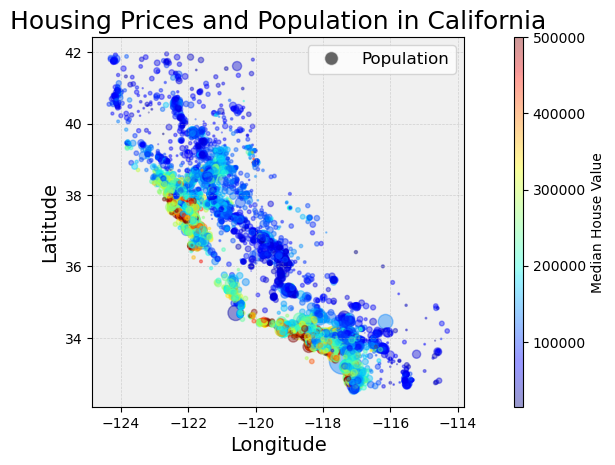

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use a diverging color map for better contrast
cmap = plt.get_cmap('jet')

# Adjusting the size of each point based on the median income
size = housing['population'] / 100

# Creating a scatter plot
scatter_plot = plt.scatter(
    x=housing['longitude'],
    y=housing['latitude'],
    alpha=0.4,
    s=size,
    c=housing["median_house_value"],
    cmap=cmap,
    label='population'
)

# Adding a color bar legend
cbar = plt.colorbar(scatter_plot, label='Median House Value', aspect=40, pad=0.1)

# Adding a gradient legend for population size
legend_size = plt.Line2D([0], [0], marker='o', color='w', label='Population', markersize=10, linestyle='None', markerfacecolor='black', alpha=0.6)
plt.legend(handles=[legend_size], loc='upper right', fontsize=12)

# Adding a title and labels
plt.title('Housing Prices and Population in California', fontsize=18)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)

# Customizing the grid appearance
plt.grid(linestyle='dashed', linewidth=0.5, alpha=0.5)

# Adding a background color for better contrast
plt.gca().set_facecolor('#f0f0f0')

# Displaying the plot
plt.show()


In [26]:
corr_matrix = housing.corr()

/tmp/ipykernel_1237/2466220658.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


In [27]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

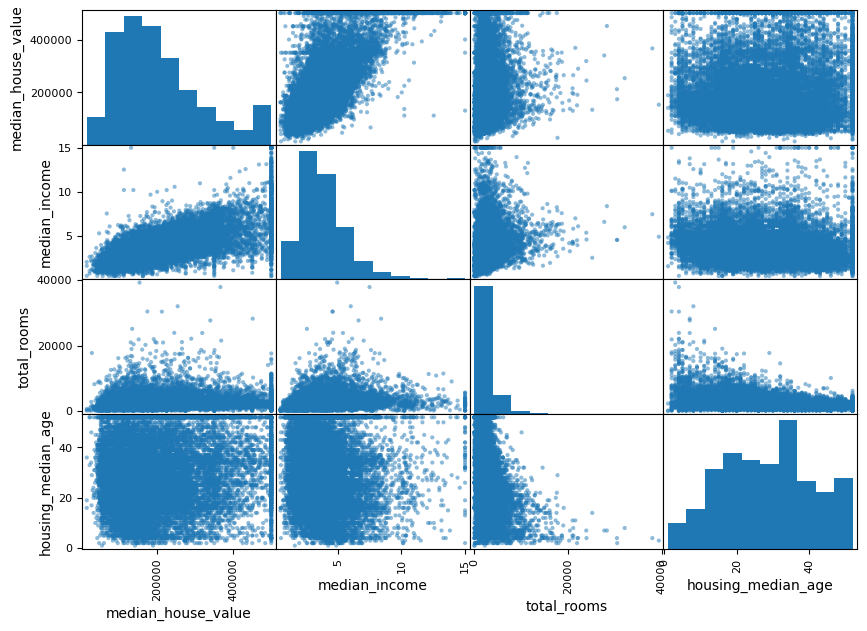

In [28]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
"housing_median_age"]
scatter_matrix(housing[attributes],figsize=(10,7))

In [29]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",s=housing['median_income'],c=housing['bedrooms_per_room'],cmap=plt.get_cmap('jet'),alpha=1,colorbar=True)

KeyError: 'bedrooms_per_room'

<Axes: >

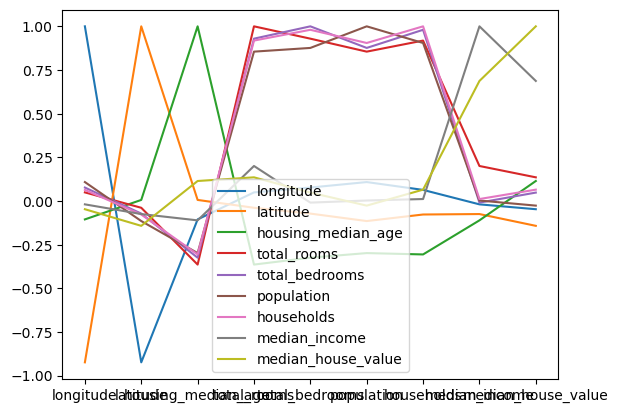

In [30]:
corr_matrix.plot()

In [31]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [32]:
housing = strat_train_set.drop('median_house_value',axis=1)
housing_label = strat_train_set['median_house_value'].copy()

In [33]:
housing_label

12655     72100.0
15502    279600.0
2908      82700.0
14053    112500.0
20496    238300.0
           ...   
15174    268500.0
12661     90400.0
19263    140400.0
19140    258100.0
19773     62700.0
Name: median_house_value, Length: 16512, dtype: float64

# Data cleaning

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
housing_num = housing.drop('ocean_proximity',axis=1)
imputer.fit(housing_num)
housing.fillna(housing_num)


,housing.csv,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,<1H OCEAN
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,INLAND
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,<1H OCEAN
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,<1H OCEAN


In [ ]:
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X,columns=housing_num.columns,index=housing_num.index)
housing_tr

,housing.csv,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964
...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964


In [ ]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [ ]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [ ]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
room_ix, bedroom_ix, population_ix, household_ix = 3,4,5,6
class CombinedAttributeAdder(BaseEstimator,TransformerMixin):
    def __init__(self,add_bedroom_per_room=True):
        self.add_bedroom_per_room = add_bedroom_per_room
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        room_per_household = X[:,room_ix] / X[:,household_ix]
        population_per_household = X[:,population_ix] / X[:,household_ix]
        if self.add_bedroom_per_room:
            bedroom_per_room = X[:,bedroom_ix] / X[:,room_ix]
            return np.c_[X,room_per_household,population_per_household,bedroom_per_room]
        else:
            return np.c_[X,room_per_household,population_per_household]
attr_adder = CombinedAttributeAdder(add_bedroom_per_room=False)
housing_extra_attributes = attr_adder.transform(housing.values)
housing_extra_attributes

array([[-121.46, 38.52, 29.0, ..., 'INLAND', 5.485835694050992,
        3.168555240793201],
       [-117.23, 33.09, 7.0, ..., 'NEAR OCEAN', 6.927083333333333,
        2.6236979166666665],
       [-119.04, 35.37, 44.0, ..., 'INLAND', 5.3933333333333335,
        2.223333333333333],
       ...,
       [-122.72, 38.44, 48.0, ..., '<1H OCEAN', 4.1104651162790695,
        2.6627906976744184],
       [-122.7, 38.31, 14.0, ..., '<1H OCEAN', 6.297405189620759,
        2.411177644710579],
       [-122.14, 39.97, 27.0, ..., 'INLAND', 5.477157360406092,
        3.1725888324873095]], dtype=object)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributeAdder()),
        ('std_scaler', StandardScaler()),
                        ])
housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.01739526,
         0.00622264, -0.12112176],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.56925554,
        -0.04081077, -0.81086696],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.01802432,
        -0.07537122, -0.33827252],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.5092404 ,
        -0.03743619,  0.32286937],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.32814891,
        -0.05915604, -0.45702273],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.01407228,
         0.00657083, -0.12169672]])

In [ ]:
from sklearn.compose import ColumnTransformer
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
])
housing_prepared = full_pipeline.fit_transform(housing)

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared,housing_label)


LinearRegression()

In [ ]:
housing_label

NameError: name 'housing_label' is not defined

In [ ]:
some_data = housing.iloc[:5]
some_labels = housing_label.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Prediction",lin_reg.predict(some_data_prepared))


Prediction [ 85646. 305502. 152054. 186104. 244566.]


In [ ]:
print("Labels:", list(some_labels))

Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [ ]:
from sklearn.metrics import mean_squared_error
housing_prediction = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_label, housing_prediction)
lim_rmse = np.sqrt(lin_mse)
lim_rmse

68627.88276693555

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared,housing_label)

DecisionTreeRegressor()

In [ ]:
housing_prediction = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_label,housing_prediction)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg,housing_prepared,housing_label,scoring='neg_mean_squared_error',cv= 10)
tree_rmse_scores = np.sqrt(-scores)


In [ ]:
display_scores(tree_rmse_scores)

Scores: [72624.97695034 70169.87723622 68165.37933998 71478.62914545
 71088.2946407  77397.03124383 70268.26072604 73326.75401704
 66678.4573125  69806.02379887]
Mean: 71100.36844109796
Standard deviation: 2801.3107193812293


In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared,housing_label)

RandomForestRegressor()

In [ ]:
forest_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_label,forest_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18709.74613748186

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg,param_grid,cv= 5,scoring='neg_mean_squared_error',return_train_score= True)
grid_search.fit(housing_prepared,housing_label)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
grid_predict = grid_search.predict(housing_prepared)
grid_mse = mean_squared_error(housing_label,grid_predict)
grid_rmse = np.sqrt(grid_mse)
grid_rmse

19309.80556033568

In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.20175884e-02, 6.63448676e-02, 4.10958684e-02, 1.80904618e-02,
       1.67650796e-02, 1.76617799e-02, 1.64758047e-02, 3.14472149e-01,
       5.89257923e-02, 1.13866547e-01, 8.07930566e-02, 1.33285307e-02,
       1.61752727e-01, 5.77261244e-05, 2.87984787e-03, 5.47217313e-03])

In [ ]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.314472148693365, 'median_income'),
 (0.1617527271881823, 'INLAND'),
 (0.11386654698648775, 'pop_per_hhold'),
 (0.08079305659852219, 'bedrooms_per_room'),
 (0.07201758836157887, 'housing.csv'),
 (0.06634486764182666, 'latitude'),
 (0.05892579234613629, 'rooms_per_hhold'),
 (0.04109586839925364, 'housing_median_age'),
 (0.01809046175353656, 'total_rooms'),
 (0.017661779894941616, 'population'),
 (0.016765079570534917, 'total_bedrooms'),
 (0.016475804708241695, 'households'),
 (0.013328530736013755, '<1H OCEAN'),
 (0.005472173126943203, 'NEAR OCEAN'),
 (0.0028798478699868387, 'NEAR BAY'),
 (5.772612444885034e-05, 'ISLAND')]

In [ ]:
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse) # => evaluates to 47,730.2


48123.98605733197

In [ ]:
from sklearn.svm import SVR
vec_reg = SVR(kernel= 'linear', C=10000)
vec_reg.fit(housing_prepared,housing_label)


SVR(C=10000, kernel='linear')

In [ ]:
def rmse(model):
    return np.sqrt(mean_squared_error(housing_label,model.predict(housing_prepared)))


In [ ]:
rmse(vec_reg)

70177.7767920956

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]
forest_reg = RandomForestRegressor()
grid_searchi = RandomizedSearchCV(forest_reg,param_grid,cv= 5,scoring='neg_mean_squared_error',return_train_score= True)
grid_searchi.fit(housing_prepared,housing_label)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions=[{'max_features': [2, 4, 6, 8],
                                         'n_estimators': [3, 10, 30]},
                                        {'bootstrap': [False],
                                         'max_features': [2, 3, 4],
                                         'n_estimators': [3, 10]}],
                   return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
rmse(grid_searchi)

19339.754897270508

In [ ]:
rmse(grid_search)

19309.80556033568